<a href="https://colab.research.google.com/github/EddyGiusepe/Recommendation_of_MyAnimeList_2021/blob/main/RecomendacaoAnime_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <h2 align='center'>Aplicando Regressão a Dados de Anime2020</h2> 


**Cientista de Dados Jr.:**  Dr.Eddy Giusepe Chirinos Isidro

Este Script está baseado no [Kaggle - Recomendação Animes2020](https://github.com/Alejandro1848/Curso-Machine-Learning-YouTube/blob/main/Regresi%C3%B3n_Ridge_Ejemplo2.ipynb).

In [1]:
# Importamos nossas bibliotecas

import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn

from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [2]:
# Carregamos nossos Dados

df=pd.read_csv('/content/drive/MyDrive/1_Kaggle_TensorFlow_linksJORGE_etc/AnimesList_2020/anime.csv')


In [3]:
# Visualizamos nossos Dados

df.sample(5)

,MAL_ID,Name,Score,Genres,English name,Japanese name,Type,Episodes,Aired,Premiered,Producers,Licensors,Studios,Source,Duration,Rating,Ranked,Popularity,Members,Favorites,Watching,Completed,On-Hold,Dropped,Plan to Watch,Score-10,Score-9,Score-8,Score-7,Score-6,Score-5,Score-4,Score-3,Score-2,Score-1
8157,19855,Nobunagun,6.71,"Action, Sci-Fi, Super Power",Nobunagun,ノブナガン,TV,13,"Jan 5, 2014 to Mar 30, 2014",Winter 2014,"VAP, Earth Star Entertainment",Funimation,Bridge,Manga,24 min. per ep.,R - 17+ (violence & profanity),4864.0,2017,59431,126,3491,33485,2568,7360,12527,1185.0,2197.0,5161.0,7779.0,5537.0,3385.0,1686.0,728.0,385.0,231.0
10058,29547,Sanrio Christmas Fantasia,Unknown,"Kids, Magic, Fantasy",Unknown,サンリオ・クリスマス・ファンタジア,OVA,1,"Nov 1, 1992",Unknown,Sanrio,Unknown,Unknown,Unknown,5 min.,G - All Ages,11809.0,14788,205,1,11,72,4,34,84,10.0,Unknown,4.0,7.0,9.0,9.0,Unknown,Unknown,2.0,1.0
2200,2403,Kodomo no Jikan (TV),6.82,"Comedy, Drama, Ecchi, School",Unknown,こどものじかん,TV,12,"Oct 12, 2007 to Dec 28, 2007",Fall 2007,"Bandai Visual, Lantis, Movic, Dream Force, Fut...",Unknown,Diomedéa,Manga,24 min. per ep.,R - 17+ (violence & profanity),4350.0,1431,96749,542,3947,59117,2942,5389,25354,3414.0,4682.0,9611.0,12210.0,7584.0,4275.0,2347.0,1266.0,1002.0,1352.0
677,740,Bishoujo Senshi Sailor Moon R,7.69,"Demons, Magic, Romance, Shoujo",Sailor Moon R,美少女戦士セーラームーン R,TV,43,"Mar 6, 1993 to Mar 12, 1994",Spring 1993,TV Asahi,"ADV Films, VIZ Media, DiC Entertainment",Toei Animation,Manga,24 min. per ep.,PG-13 - Teens 13 or older,1051.0,1213,120962,849,5165,96739,3391,1828,13839,10554.0,10728.0,16358.0,18395.0,7840.0,3193.0,770.0,258.0,132.0,131.0
13520,36269,Detective Conan: Anti-Crime Guide,6.34,Kids,Unknown,名探偵コナン 防犯ガイド,OVA,1,2006,Unknown,Unknown,Unknown,Unknown,Other,26 min.,G - All Ages,6684.0,9292,1674,3,74,492,69,89,950,41.0,8.0,39.0,65.0,59.0,27.0,9.0,6.0,4.0,3.0


In [4]:
df.shape

(17562, 35)

In [5]:
pd.set_option('display.max_columns',35)

In [6]:
df.sample(5)

,MAL_ID,Name,Score,Genres,English name,Japanese name,Type,Episodes,Aired,Premiered,Producers,Licensors,Studios,Source,Duration,Rating,Ranked,Popularity,Members,Favorites,Watching,Completed,On-Hold,Dropped,Plan to Watch,Score-10,Score-9,Score-8,Score-7,Score-6,Score-5,Score-4,Score-3,Score-2,Score-1
16719,41587,Boku no Hero Academia 5th Season,Unknown,"Action, Comedy, Super Power, School, Shounen",Unknown,僕のヒーローアカデミア,TV,Unknown,"Mar 27, 2021 to ?",Spring 2021,Unknown,Unknown,Bones,Manga,Unknown,PG-13 - Teens 13 or older,Unknown,627,231671,2767,13,6,11,2,231639,10.0,3.0,5.0,2.0,Unknown,Unknown,Unknown,Unknown,Unknown,1.0
9485,26209,Examurai Sengoku Recap,Unknown,"Action, Samurai",Unknown,エグザムライ戦国,Special,1,"Apr 1, 2009",Unknown,Unknown,Unknown,TMS Entertainment,Unknown,15 min.,PG-13 - Teens 13 or older,13918.0,13705,279,0,14,94,10,35,126,4.0,2.0,1.0,4.0,8.0,10.0,5.0,Unknown,8.0,5.0
10256,29954,Embah,4.08,Dementia,Unknown,embah,ONA,1,2010,Unknown,Unknown,Unknown,Unknown,Original,8 min.,G - All Ages,10996.0,12025,519,0,9,403,5,23,79,8.0,1.0,6.0,3.0,25.0,27.0,55.0,54.0,54.0,67.0
7899,18489,Xi Yang Yang Yu Hui Tai Lang: Zhi Tu Nian Ding...,Unknown,"Adventure, Comedy, Kids",Pleasant Goat and Big Big Wolf:Moon Castle - T...,喜羊羊与灰太狼 之兔年顶瓜瓜,Movie,1,"Jan 21, 2011",Unknown,"Creative Power Entertaining, Alpha Group Co. Ltd.",Unknown,Unknown,Unknown,1 hr. 27 min.,G - All Ages,12887.0,13754,277,0,9,134,6,58,70,7.0,3.0,10.0,10.0,16.0,17.0,8.0,6.0,3.0,5.0
12127,33876,Kochira Katsushikaku Kameari Kouenmae Hashutsu...,Unknown,"Comedy, Police",Unknown,こちら葛飾区亀有公園前派出所 両さんと忠犬ラッキー物語 〜亀有大包囲網をかわせ!!,Special,1,"Oct 23, 2005",Unknown,Unknown,Unknown,Unknown,Manga,20 min.,PG-13 - Teens 13 or older,15093.0,12858,373,0,12,147,9,38,167,9.0,2.0,14.0,27.0,12.0,8.0,3.0,1.0,1.0,2.0


In [7]:
# Substitui "unknow" --> 0

df = df.replace('Unknown', float(0)) 

In [8]:
df.sample(2)

,MAL_ID,Name,Score,Genres,English name,Japanese name,Type,Episodes,Aired,Premiered,Producers,Licensors,Studios,Source,Duration,Rating,Ranked,Popularity,Members,Favorites,Watching,Completed,On-Hold,Dropped,Plan to Watch,Score-10,Score-9,Score-8,Score-7,Score-6,Score-5,Score-4,Score-3,Score-2,Score-1
1714,1883,Kappa no Kaikata,6.3,Comedy,How to Breed Kappas,カッパの飼い方,TV,26,"Oct 4, 2004 to Apr 4, 2005",Fall 2004,Nihon Ad Systems,0,Picture Magic,Manga,3 min. per ep.,PG - Children,6892.0,9130,1777,6,73,888,79,162,575,45.0,36.0,97.0,177.0,158.0,91.0,64.0,26.0,22.0,15.0
6077,10118,Ginga Tetsudou 999: Jikuu wo Koeta Energy no Tabi,6.17,"Adventure, Drama, Sci-Fi",0,銀河鉄道９９９ 時空を越えたエネルギーの旅,ONA,5,"Jul 24, 2010 to Sep 24, 2010",0,0,0,Toei Animation,0,4 min. per ep.,PG-13 - Teens 13 or older,7505.0,11437,666,0,24,195,36,52,359,11.0,5.0,10.0,33.0,20.0,18.0,8.0,4.0,2.0,3.0


In [9]:
# Aqui eliminamos as colunas que não são relevantes para a nossa análise

df=df.drop(['MAL_ID', 'Name', 'Genres', 'English name', 'Japanese name', 'Type', 'Aired', 'Premiered', 'Producers', 'Licensors', 'Studios', 'Source', 'Duration', 'Rating', 'Ranked', 'Score-10',
            'Score-9', 'Score-8', 'Score-7', 'Score-6', 'Score-5', 'Score-4', 'Score-3', 'Score-2', 'Score-1'],axis=1)


In [10]:
df.head()

,Score,Episodes,Popularity,Members,Favorites,Watching,Completed,On-Hold,Dropped,Plan to Watch
0,8.78,26,39,1251960,61971,105808,718161,71513,26678,329800
1,8.39,1,518,273145,1174,4143,208333,1935,770,57964
2,8.24,26,201,558913,12944,29113,343492,25465,13925,146918
3,7.27,26,1467,94683,587,4300,46165,5121,5378,33719
4,6.98,52,4369,13224,18,642,7314,766,1108,3394


In [11]:
df=df.astype(float)

In [12]:
df.shape

(17562, 10)

In [13]:
df = df[df.Score > 0.0]

In [14]:
df.head(2)

,Score,Episodes,Popularity,Members,Favorites,Watching,Completed,On-Hold,Dropped,Plan to Watch
0,8.78,26.0,39.0,1251960.0,61971.0,105808.0,718161.0,71513.0,26678.0,329800.0
1,8.39,1.0,518.0,273145.0,1174.0,4143.0,208333.0,1935.0,770.0,57964.0


In [15]:
df.isnull().sum() 

Score            0
Episodes         0
Popularity       0
Members          0
Favorites        0
Watching         0
Completed        0
On-Hold          0
Dropped          0
Plan to Watch    0
dtype: int64

In [16]:
df.columns

Index(['Score', 'Episodes', 'Popularity', 'Members', 'Favorites', 'Watching',
       'Completed', 'On-Hold', 'Dropped', 'Plan to Watch'],
      dtype='object')

In [17]:
# A seguir definimos nossos Dados para "X" e "Y"

# Primeiro para Y:

Y = df.Score

In [18]:
Y.shape

(12421,)

In [20]:
Y.head(10)

0    8.78
1    8.39
2    8.24
3    7.27
4    6.98
5    7.95
6    8.06
7    7.59
8    8.15
9    8.76
Name: Score, dtype: float64

In [21]:
# Agora para X:

X = df.drop(['Score'], axis=1)


In [22]:
X.shape

(12421, 9)

In [28]:
X.sample(5)

,Episodes,Popularity,Members,Favorites,Watching,Completed,On-Hold,Dropped,Plan to Watch
8592,1.0,4078.0,15676.0,194.0,1073.0,9339.0,567.0,466.0,4231.0
11735,11.0,2090.0,56278.0,213.0,2155.0,40834.0,1000.0,1387.0,10902.0
6482,2.0,11153.0,747.0,0.0,27.0,395.0,20.0,60.0,245.0
7334,24.0,2279.0,49347.0,161.0,3830.0,25316.0,2449.0,4181.0,13571.0
1286,1.0,5935.0,6231.0,2.0,107.0,3938.0,87.0,79.0,2020.0


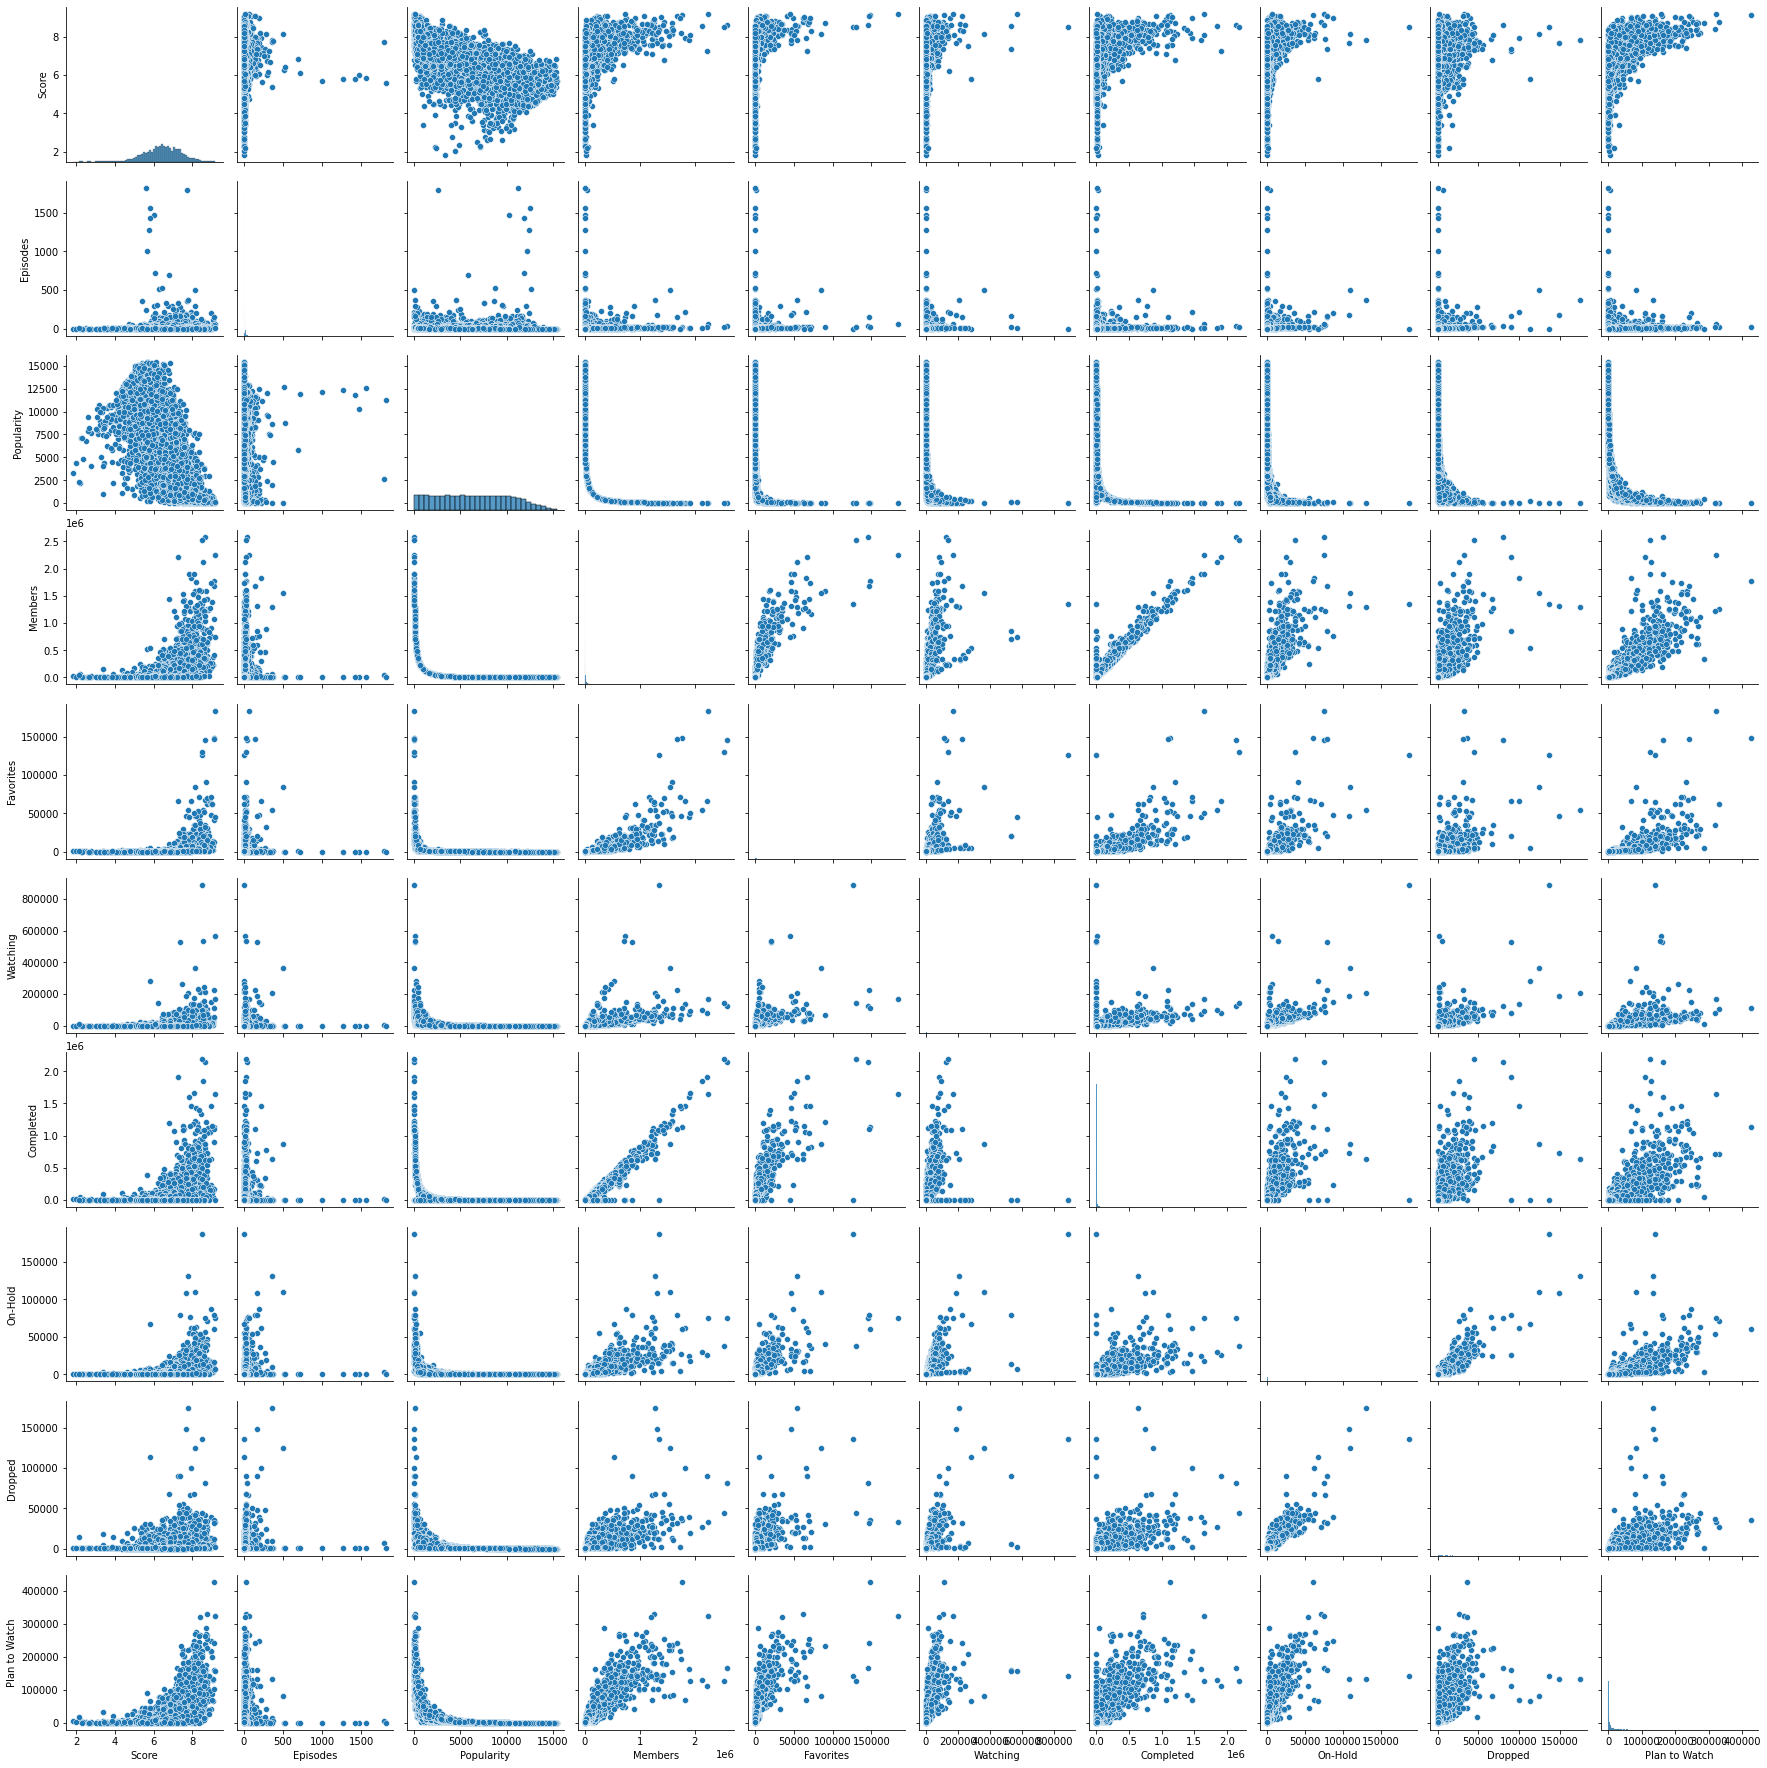

In [24]:
sns.pairplot(df)

In [ ]:
# X=X.replace('Unknown', float(0))
# Y=Y.replace('Unknown', float(0))

In [30]:
Y=Y.astype(float)
X=X.astype(float)

In [31]:
# Mais uma vez observamos o Shape:

Y.shape

(12421,)

In [32]:
X.shape

(12421, 9)

## <font color="orange">Regressão Ridge</font>

A Ridge Regression é um método de regularização do modelo que tem como principal objetivo suavizar atributos que sejam relacionados uns aos outros e que aumentam o ruído no modelo (A.K.A multicolinearidade).